<a href="https://colab.research.google.com/github/moonbeam87/Stonks/blob/master/ESN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install easyesn

     |████████████████████████████████| 51kB 2.3MB/s 


In [2]:
from easyesn import PredictionESN

Using Numpy backend.


In [3]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import numpy as np
from tqdm import tqdm
import time
def get_dataframe(name):
    df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + name +'&apikey=WCXVE7BAD668SJHL&datatype=csv')
    return df
def get_series(names):
    series = []
    for name in names:
        df = get_dataframe(name)
        series.append(df)
    return series
#main is here
names = ['AAPL', 'GOOGL', 'FB', 'IBM', 'AMZN']
series = get_series(names)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
series

[     timestamp    open    high     low   close    volume
 0   2020-04-24  277.20  283.01  277.00  282.97  31274973
 1   2020-04-23  275.87  281.75  274.87  275.03  31203582
 2   2020-04-22  273.61  277.90  272.20  276.10  29264342
 3   2020-04-21  276.28  277.25  265.43  268.37  45247893
 4   2020-04-20  277.95  281.68  276.85  276.93  32503750
 ..         ...     ...     ...     ...     ...       ...
 95  2019-12-06  267.48  271.00  267.30  270.71  26547493
 96  2019-12-05  263.79  265.89  262.73  265.58  18661343
 97  2019-12-04  261.07  263.31  260.68  261.74  16810388
 98  2019-12-03  258.31  259.53  256.29  259.45  29377268
 99  2019-12-02  267.27  268.25  263.45  264.16  23693550
 
 [100 rows x 6 columns],
      timestamp     open     high      low    close   volume
 0   2020-04-24  1255.00  1277.71  1244.00  1276.60  1847356
 1   2020-04-23  1265.74  1288.15  1260.53  1271.17  1710122
 2   2020-04-22  1241.11  1279.88  1237.20  1258.41  2315792
 3   2020-04-21  1242.71  1250.00

In [0]:

#BackupKey = JA1VCTFBG7378ZB7
def get_dataframe(name):
    df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + name +'&apikey=WCXVE7BAD668SJHL&datatype=csv')
    df = df.rename(columns={"timestamp":"Date"})
    df = df.set_index(df['Date'])
    df = df.sort_index()
    df = df.drop(columns=['open', 'low', 'high', 'volume'])
    return df
def run_prophet(df):
    df = df.rename(columns={"timestamp": "Date"})
    df = df.reset_index(0)
    df = df.drop(columns=['open', 'low', 'close', 'volume'])
    df = df.rename(columns={"Date": "ds", "high": "y"})
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    i = forecast[['yhat']].iloc[-1]
    return i['yhat']
def get_series(names):
    series = []
    for name in names:
        df = get_dataframe(name)
        series.append(df)
    return series
#main is here

names = ['AAPL', 'GOOGL', 'FB', 'IBM', 'AMZN']
series = get_series(names)
stocks = pd.concat(series, axis = 1)
stocks = stocks.drop(columns={'Date'})
stocks.columns = ['aapl','googl','fb','ibm', 'amzn']

In [6]:
stocks

,aapl,googl,fb,ibm,amzn
Date,,,,,
2019-12-02,264.16,1288.86,199.70,132.91,1781.60
2019-12-03,259.45,1294.74,198.82,132.12,1769.96
2019-12-04,261.74,1318.94,198.71,131.99,1760.69
2019-12-05,265.58,1326.96,199.36,131.91,1740.48
2019-12-06,270.71,1339.39,201.05,133.22,1751.60
...,...,...,...,...,...
2020-04-20,276.93,1261.15,178.24,120.41,2393.61
2020-04-21,268.37,1212.16,170.80,116.76,2328.12
2020-04-22,276.10,1258.41,182.28,119.31,2363.49


In [7]:
stocks.reset_index()

,Date,aapl,googl,fb,ibm,amzn
0,2019-12-02,264.16,1288.86,199.70,132.91,1781.60
1,2019-12-03,259.45,1294.74,198.82,132.12,1769.96
2,2019-12-04,261.74,1318.94,198.71,131.99,1760.69
3,2019-12-05,265.58,1326.96,199.36,131.91,1740.48
4,2019-12-06,270.71,1339.39,201.05,133.22,1751.60
...,...,...,...,...,...,...
95,2020-04-20,276.93,1261.15,178.24,120.41,2393.61
96,2020-04-21,268.37,1212.16,170.80,116.76,2328.12
97,2020-04-22,276.10,1258.41,182.28,119.31,2363.49
98,2020-04-23,275.03,1271.17,185.13,121.35,2399.45


In [9]:
stocks.drop(columns={'Date'})

KeyError: ignored

In [11]:
stocks = stocks.drop(columns=['Date'])

KeyError: ignored

In [12]:
stocks

,aapl,googl,fb,ibm,amzn
Date,,,,,
2019-12-02,264.16,1288.86,199.70,132.91,1781.60
2019-12-03,259.45,1294.74,198.82,132.12,1769.96
2019-12-04,261.74,1318.94,198.71,131.99,1760.69
2019-12-05,265.58,1326.96,199.36,131.91,1740.48
2019-12-06,270.71,1339.39,201.05,133.22,1751.60
...,...,...,...,...,...
2020-04-20,276.93,1261.15,178.24,120.41,2393.61
2020-04-21,268.37,1212.16,170.80,116.76,2328.12
2020-04-22,276.10,1258.41,182.28,119.31,2363.49


In [0]:
stocks = stocks.reset_index()

In [0]:
stocks = stocks.drop(columns=['Date'])

In [15]:
stocks

,aapl,googl,fb,ibm,amzn
0,264.16,1288.86,199.70,132.91,1781.60
1,259.45,1294.74,198.82,132.12,1769.96
2,261.74,1318.94,198.71,131.99,1760.69
3,265.58,1326.96,199.36,131.91,1740.48
4,270.71,1339.39,201.05,133.22,1751.60
...,...,...,...,...,...
95,276.93,1261.15,178.24,120.41,2393.61
96,268.37,1212.16,170.80,116.76,2328.12
97,276.10,1258.41,182.28,119.31,2363.49
98,275.03,1271.17,185.13,121.35,2399.45


In [0]:
train = stocks[0:60]
test = stocks[60::]

In [17]:
train

,aapl,googl,fb,ibm,amzn
0,264.16,1288.86,199.70,132.91,1781.60
1,259.45,1294.74,198.82,132.12,1769.96
2,261.74,1318.94,198.71,131.99,1760.69
3,265.58,1326.96,199.36,131.91,1740.48
4,270.71,1339.39,201.05,133.22,1751.60
5,266.92,1342.99,201.34,133.92,1749.51
6,268.48,1342.89,200.87,133.91,1739.21
7,270.77,1344.25,202.26,133.76,1748.72
8,271.46,1348.49,196.75,135.32,1760.33
9,275.15,1346.87,194.11,134.21,1760.94


In [0]:
appleTrain = train['aapl']

In [19]:
appleTrain

0     264.16
1     259.45
2     261.74
3     265.58
4     270.71
5     266.92
6     268.48
7     270.77
8     271.46
9     275.15
10    279.86
11    280.41
12    279.74
13    280.02
14    279.44
15    284.00
16    284.27
17    289.91
18    289.80
19    291.52
20    293.65
21    300.35
22    297.43
23    299.80
24    298.39
25    303.19
26    309.63
27    310.33
28    316.96
29    312.68
30    311.34
31    315.24
32    318.73
33    316.57
34    317.70
35    319.23
36    318.31
37    308.95
38    317.69
39    324.34
40    323.87
41    309.51
42    308.66
43    318.85
44    321.45
45    325.21
46    320.03
47    321.55
48    319.61
49    327.20
50    324.87
51    324.95
52    319.00
53    323.62
54    320.30
55    313.05
56    298.18
57    288.08
58    292.65
59    273.52
Name: aapl, dtype: float64

In [0]:
appleTrain = train.drop(columns=['googl', 'ibm', 'fb', 'amzn'])
appleTest = test.drop(columns=['googl', 'ibm', 'fb', 'amzn'])

In [21]:
appleTrain

,aapl
0,264.16
1,259.45
2,261.74
3,265.58
4,270.71
5,266.92
6,268.48
7,270.77
8,271.46
9,275.15


In [41]:
appleTrain.reset_index()
appleTest.reset_index()


,index,aapl
0,60,273.36
1,61,298.81
2,62,289.32
3,63,302.74
4,64,292.92
5,65,289.03
6,66,266.17
7,67,285.34
8,68,275.43
9,69,248.23


In [24]:
x_train = appleTrain['index']
y_train = appleTrain['aapl']

KeyError: ignored

In [0]:
appleTrain = appleTrain.rename(columns={"index":"x"})


In [26]:
x_train = appleTrain['x']
y_train = appleTrain['aapl']

KeyError: ignored

In [27]:
appleTrain

,aapl
0,264.16
1,259.45
2,261.74
3,265.58
4,270.71
5,266.92
6,268.48
7,270.77
8,271.46
9,275.15


In [0]:
appleTrain = appleTrain.reset_index()
appleTrain = appleTrain.rename(columns={"index":"x"})
x_train = appleTrain['x']
y_train = appleTrain['aapl']

appleTest = appleTest.reset_index()
appleTest = appleTest.rename(columns={"index":"x"})
x_test = appleTest['x']
y_test = appleTest['aapl']

In [0]:
esn = PredictionESN(n_input=1, n_output=1,n_reservoir=50,leakingRate=0.2,regressionParameters=[1e-2], solver='lsqr', feedback=False)

In [33]:
esn.fit(x_train, y_train, transientTime='Auto', verbose = 1)

ValueError: ignored

In [37]:
esn.fit(x_train, y_train, transientTime=50, verbose = 1)

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


6.494655900912783

In [43]:
one_step_prediction = esn.predict(appleTest)


ValueError: ignored

In [0]:
one_step_prediction = esn.predict(y_test)

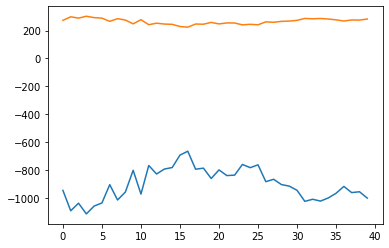

In [49]:
plt.plot(one_step_prediction.T[0, :])
plt.plot(y_test)
plt.show()